<a href="https://colab.research.google.com/github/psyifa/Personality-Classification/blob/main/70_30_Gruoped_Random_deletion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
source_folder = '/content/drive/My Drive/TugasAkhir/Data'
destination_folder1 = '/content/drive/My Drive/TugasAkhir/ModelRandomDeletion1'
destination_folder2 = '/content/drive/My Drive/TugasAkhir/ModelRandomDeletionStemming'

In [ ]:
import os
import pandas as pd
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re

##Mulai disini

In [ ]:
# Menyimpan path ke file grouped_data
grupdata_path = source_folder + '/grouped_data.csv'

# Membaca file CSV menjadi DataFrame
grupdata = pd.read_csv(grupdata_path)

# Menampilkan 5 baris pertama dari DataFrame
grupdata.head()

,username,untokenized_tweet,label_encoded
0,BukanVandika,studio tropik mbak bagus dia di harga segitu k...,2
1,ExclusiApp,DM kakak gapapa nder membuat jujur jauh cepat ...,0
2,MAriqFauzi1,praktikum pakai daster kurang cocok modelnya m...,1
3,_____rifqy,gila data jelek banget tidak ada uang ambil ra...,0
4,__bananauyu,benar di spill mulut samaaa debut dengar lagu ...,2


In [ ]:
from sklearn.model_selection import train_test_split
# Memastikan label yang konsisten untuk setiap username
# Jika 'label_encoded' sudah ada dan valid, maka tidak perlu mengubah labelnya
label_distribution = grupdata.groupby('username')['label_encoded'].apply(lambda x: x.mode()[0]).reset_index()
label_distribution.columns = ['username', 'label_encoded']

# Membagi data menjadi data training (70%) dan testing (30%) berdasarkan username
train_usernames, test_usernames = train_test_split(
    label_distribution['username'],
    test_size=0.3,
    random_state=42,
    stratify=label_distribution['label_encoded']  # Stratifikasi berdasarkan label
)

# Memisahkan data asli menjadi data training dan testing berdasarkan username
train_data = grupdata[grupdata['username'].isin(train_usernames)]
test_data = grupdata[grupdata['username'].isin(test_usernames)]

# Menampilkan distribusi label di data training dan testing
print("Distribusi Label di Data Training:")
print(train_data['label_encoded'].value_counts())
print("\nDistribusi Label di Data Testing:")
print(test_data['label_encoded'].value_counts())

# Menyusun X (fitur) dan y (label) untuk model
X_train = train_data['untokenized_tweet']  # Ambil tweet untuk data latih
y_train = train_data['label_encoded']  # Label untuk data latih

X_test = test_data['untokenized_tweet']  # Ambil tweet untuk data uji
y_test = test_data['label_encoded']  # Label untuk data uji

Distribusi Label di Data Training:
label_encoded
0    73
1    54
2    34
3    13
4     5
Name: count, dtype: int64

Distribusi Label di Data Testing:
label_encoded
0    32
1    24
2    15
3     5
4     2
Name: count, dtype: int64


<ipython-input-6-74341dece008>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_encoded', data=train_data, palette='viridis')


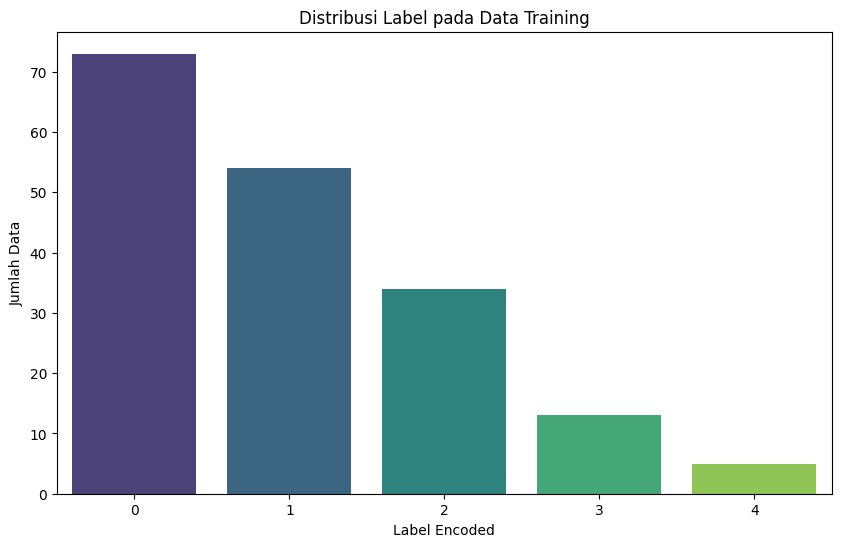

<ipython-input-6-74341dece008>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_encoded', data=test_data, palette='viridis')


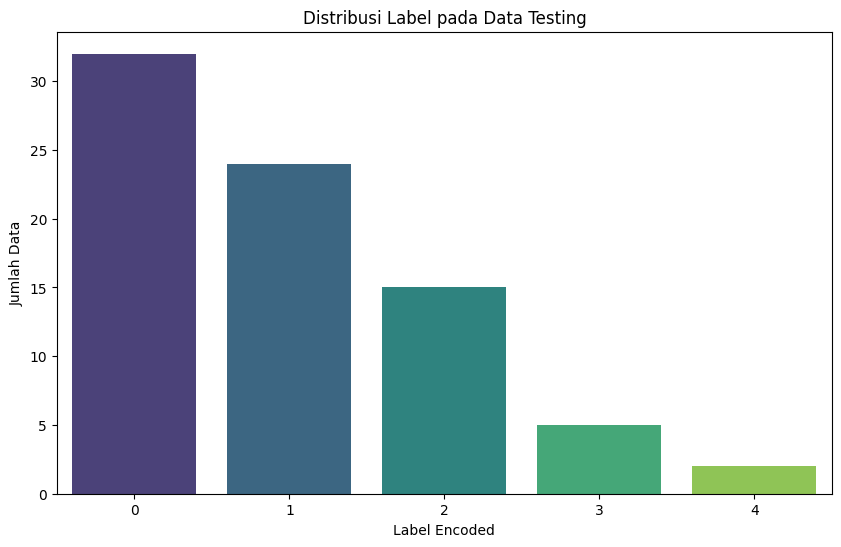

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi label pada data training
plt.figure(figsize=(10, 6))
sns.countplot(x='label_encoded', data=train_data, palette='viridis')
plt.title('Distribusi Label pada Data Training')
plt.xlabel('Label Encoded')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.show()

# Visualisasi distribusi label pada data testing
plt.figure(figsize=(10, 6))
sns.countplot(x='label_encoded', data=test_data, palette='viridis')
plt.title('Distribusi Label pada Data Testing')
plt.xlabel('Label Encoded')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.show()



Distribusi username unik berdasarkan label di data training:
label_encoded
0    73
1    73
2    73
3    73
4    73
Name: username, dtype: int64


<ipython-input-7-79fd75c1c487>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_encoded', data=upsampled_train_data, palette='viridis')


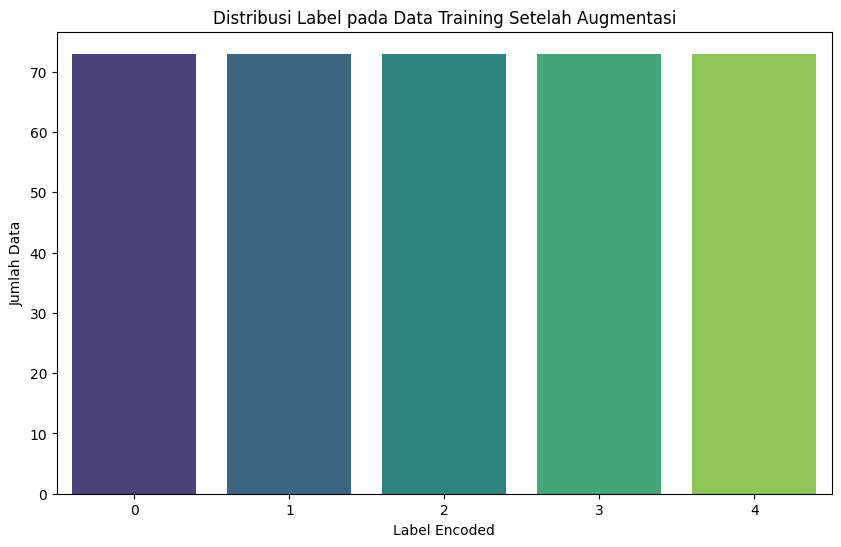

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed untuk konsistensi
random.seed(42)

# Fungsi untuk random deletion
def random_deletion(sentence, deletion_prob=0.1):
    words = sentence.split()
    if len(words) == 1:  # Jika hanya satu kata, tidak menghapus
        return sentence
    new_words = [word for word in words if random.uniform(0, 1) > deletion_prob]
    if not new_words:  # Jika semua kata terhapus, tetap ambil satu kata
        new_words = [random.choice(words)]
    return " ".join(new_words)

# Data tambahan manual untuk setiap label
additional_user_count = {
     0: 0,
    1: 19,
    2: 39,
    3: 60,
    4: 68
}

# Pastikan kolom data sesuai
required_columns = ['username', 'untokenized_tweet', 'label_encoded']
assert all(col in train_data.columns for col in required_columns), "Kolom data tidak sesuai."

# DataFrame untuk menyimpan hasil upsampling
upsampled_train_data = pd.DataFrame()

# Proses untuk setiap label
for label, missing_count in additional_user_count.items():
    label_data = train_data[train_data['label_encoded'] == label]
    usernames = label_data['username'].unique()

    if missing_count > 0:
        additional_usernames = random.choices(usernames, k=missing_count)
        additional_data = pd.DataFrame()

        for i, username in enumerate(additional_usernames):
            user_data = label_data[label_data['username'] == username].copy()

            # Modifikasi tweet dengan random deletion
            user_data['untokenized_tweet'] = user_data['untokenized_tweet'].apply(
                lambda x: random_deletion(x, deletion_prob=0.2)
            )

            # Perbarui username agar unik
            user_data['username'] = f"{username}_copy{i + 1}"

            # Tambahkan data ke hasil augmentasi
            additional_data = pd.concat([additional_data, user_data], ignore_index=True)

        # Gabungkan data asli dengan data tambahan
        label_data = pd.concat([label_data, additional_data], ignore_index=True)

    upsampled_train_data = pd.concat([upsampled_train_data, label_data], ignore_index=True)

# Distribusi username unik berdasarkan label di data training
username_distribution_upsampled = upsampled_train_data.groupby('label_encoded')['username'].nunique()
print("\nDistribusi username unik berdasarkan label di data training:")
print(username_distribution_upsampled)

# Visualisasi distribusi label pada data training setelah augmentasi
plt.figure(figsize=(10, 6))
sns.countplot(x='label_encoded', data=upsampled_train_data, palette='viridis')
plt.title('Distribusi Label pada Data Training Setelah Augmentasi')
plt.xlabel('Label Encoded')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import hstack

# Fungsi untuk menyiapkan fitur berdasarkan skenario
def prepare_features(upsampled_train_data, test_data, scenario):
    train_texts = upsampled_train_data['untokenized_tweet']  # Menggunakan data tweet dari upsampled_train_data
    test_texts = test_data['untokenized_tweet']  # Menggunakan kolom untokenized_tweet dari test_data

    if scenario == "TF-IDF":  # Hanya menggunakan TF-IDF
        vectorizer = TfidfVectorizer(ngram_range=(1, 1))  # Unigram untuk TF-IDF
        X_train = vectorizer.fit_transform(train_texts)
        X_test = vectorizer.transform(test_texts)

    elif scenario == "TF-IDF + BOW":
        # Kombinasi TF-IDF dan BOW (Bag of Words)
        tfidf = TfidfVectorizer(ngram_range=(1, 1))  # Unigram untuk TF-IDF
        bow = CountVectorizer(ngram_range=(1, 1))  # Unigram untuk BOW
        X_train_tfidf = tfidf.fit_transform(train_texts)
        X_test_tfidf = tfidf.transform(test_texts)
        X_train_bow = bow.fit_transform(train_texts)
        X_test_bow = bow.transform(test_texts)
        X_train = hstack([X_train_tfidf, X_train_bow])  # Menggabungkan hasil TF-IDF dan BOW
        X_test = hstack([X_test_tfidf, X_test_bow])  # Menggabungkan hasil TF-IDF dan BOW

    elif scenario == "Unigram + TF-IDF":
        # TF-IDF unigram
        vectorizer = TfidfVectorizer(ngram_range=(1, 1))  # Unigram untuk TF-IDF
        X_train = vectorizer.fit_transform(train_texts)
        X_test = vectorizer.transform(test_texts)

    elif scenario == "Bigram + TF-IDF":
        # TF-IDF bigram
        vectorizer = TfidfVectorizer(ngram_range=(2, 2))  # Bigram untuk TF-IDF
        X_train = vectorizer.fit_transform(train_texts)
        X_test = vectorizer.transform(test_texts)

    elif scenario == "Trigram + TF-IDF":
        # TF-IDF trigram
        vectorizer = TfidfVectorizer(ngram_range=(3, 3))  # Trigram untuk TF-IDF
        X_train = vectorizer.fit_transform(train_texts)
        X_test = vectorizer.transform(test_texts)

    else:
        raise ValueError(f"Scenario '{scenario}' tidak dikenali!")

    return X_train, X_test


=== Scenario: TF-IDF ===
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Hyperparameter terbaik:
{'C': 100, 'max_iter': 2000, 'solver': 'saga'}
Model terbaik untuk skenario 'TF-IDF' disimpan di: path/to/destination_folder/best_model_TF-IDF.joblib
Akurasi: 0.6026
F1 Score: 0.5739
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        32
           1       0.64      0.75      0.69        24
           2       0.80      0.27      0.40        15
           3       1.00      0.20      0.33         5
           4       0.00      0.00      0.00         2

    accuracy                           0.60        78
   macro avg       0.60      0.39      0.41        78
weighted avg       0.64      0.60      0.57        78

=== Scenario: TF-IDF + BOW ===
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Hyperparameter terbaik:
{'C': 10, 'max_iter': 1000, 'solver': 'lbfgs'}
Model terbaik untuk skenario 'TF-IDF + BOW' disimpan di: path/to/destination_folder/best_model_TF-IDF_+_BOW.joblib
Akurasi: 0.7051
F1 Score: 0.6772
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        32
           1       0.84      0.88      0.86        24
           2       0.56      0.33      0.42        15
           3       0.25      0.20      0.22         5
           4       0.00      0.00      0.00         2

    accuracy                           0.71        78
   macro avg       0.47      0.46      0.45        78
weighted avg       0.67      0.71      0.68        78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


=== Scenario: Unigram + TF-IDF ===
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Hyperparameter terbaik:
{'C': 100, 'max_iter': 1000, 'solver': 'saga'}
Model terbaik untuk skenario 'Unigram + TF-IDF' disimpan di: path/to/destination_folder/best_model_Unigram_+_TF-IDF.joblib
Akurasi: 0.6026
F1 Score: 0.5604
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.78      0.65        32
           1       0.64      0.75      0.69        24
           2       1.00      0.27      0.42        15
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.60        78
   macro avg       0.44      0.36      0.35        78
weighted avg       0.62      0.60      0.56        78

=== Scenario: Bigram + TF-IDF ===


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Hyperparameter terbaik:
{'C': 100, 'max_iter': 1000, 'solver': 'saga'}
Model terbaik untuk skenario 'Bigram + TF-IDF' disimpan di: path/to/destination_folder/best_model_Bigram_+_TF-IDF.joblib
Akurasi: 0.6410
F1 Score: 0.5401
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.91      0.70        32
           1       0.78      0.88      0.82        24
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.64        78
   macro avg       0.27      0.36      0.30        78
weighted avg       0.47      0.64      0.54        78

=== Scenario: Trigram + TF-IDF ===


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Hyperparameter terbaik:
{'C': 100, 'max_iter': 2000, 'solver': 'saga'}
Model terbaik untuk skenario 'Trigram + TF-IDF' disimpan di: path/to/destination_folder/best_model_Trigram_+_TF-IDF.joblib
Akurasi: 0.6282
F1 Score: 0.5427
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.88      0.67        32
           1       0.88      0.88      0.88        24
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.63        78
   macro avg       0.28      0.35      0.31        78
weighted avg       0.49      0.63      0.54        78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Hasil Semua Skenario ===
Scenario: TF-IDF, Akurasi: 0.6026, F1 Score: 0.5739, Best Params: {'C': 100, 'max_iter': 2000, 'solver': 'saga'}
Scenario: TF-IDF + BOW, Akurasi: 0.7051, F1 Score: 0.6772, Best Params: {'C': 10, 'max_iter': 1000, 'solver': 'lbfgs'}
Scenario: Unigram + TF-IDF, Akurasi: 0.6026, F1 Score: 0.5604, Best Params: {'C': 100, 'max_iter': 1000, 'solver': 'saga'}
Scenario: Bigram + TF-IDF, Akurasi: 0.6410, F1 Score: 0.5401, Best Params: {'C': 100, 'max_iter': 1000, 'solver': 'saga'}
Scenario: Trigram + TF-IDF, Akurasi: 0.6282, F1 Score: 0.5427, Best Params: {'C': 100, 'max_iter': 2000, 'solver': 'saga'}


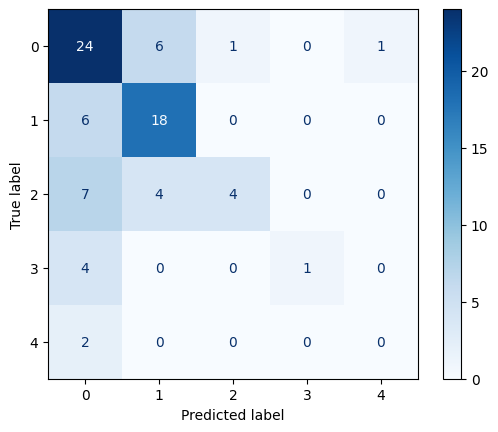

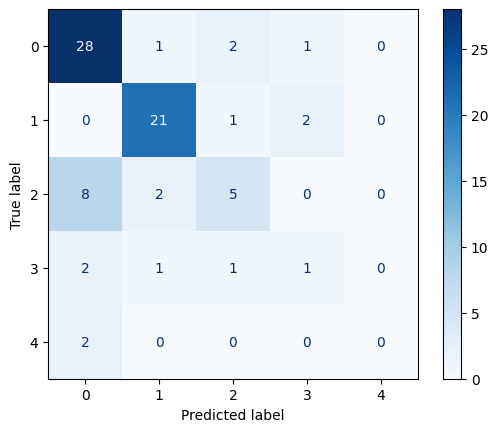

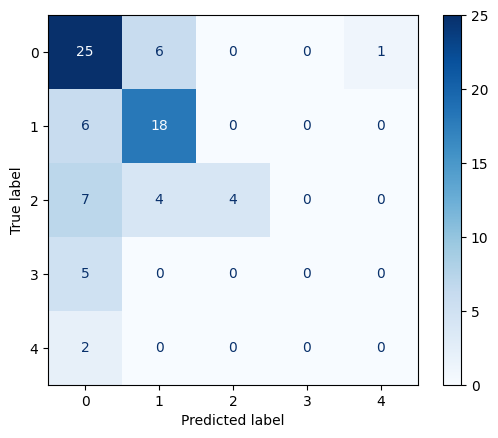

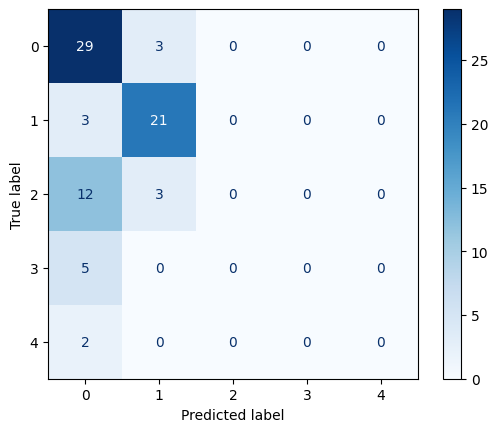

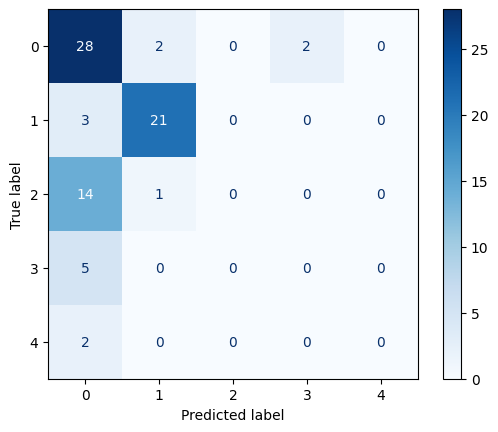

In [ ]:
import os
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Fungsi utama untuk melatih model dan evaluasi
def train_and_evaluate(upsampled_train_data, test_data, scenario, destination_folder):
    print(f"=== Scenario: {scenario} ===")

    # Menyiapkan fitur berdasarkan skenario
    X_train, X_test = prepare_features(upsampled_train_data, test_data, scenario)

    # Target labels
    y_train = upsampled_train_data['label_encoded']
    y_test = test_data['label_encoded']

    # Inisialisasi Logistic Regression
    base_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

    # Hyperparameter Grid
    param_grid = {
        'C': [0.1, 1, 10, 100],  # Regularisasi
        'solver': ['lbfgs', 'saga'],   # Solver yang mendukung multinomial
        'max_iter': [1000, 2000]       # Iterasi maksimum
    }

    # GridSearchCV untuk tuning hyperparameter
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        cv=3,  # Cross-validation 3-fold
        scoring='f1_weighted',  # Menggunakan F1 Score untuk evaluasi
        n_jobs=-1,  # Gunakan semua core yang tersedia
        verbose=2   # Output proses grid search
    )

    # Melatih model dengan data training
    grid_search.fit(X_train, y_train)

    # Model terbaik
    best_model = grid_search.best_estimator_
    print("\nHyperparameter terbaik:")
    print(grid_search.best_params_)

    # Simpan model terbaik ke folder tujuan
    model_file_path = os.path.join(destination_folder, f"best_model_{scenario.replace(' ', '_')}.joblib")
    joblib.dump(best_model, model_file_path)
    print(f"Model terbaik untuk skenario '{scenario}' disimpan di: {model_file_path}")

    # Prediksi langsung per username
    y_pred = best_model.predict(X_test)

    # Evaluasi model langsung per username
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred)

    print(f"Akurasi: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(class_report)

    # Visualisasi Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_).plot(cmap='Blues')

    print("=" * 50)

    return accuracy, f1, grid_search.best_params_

# Daftar skenario ekstraksi fitur
scenarios = [
    "TF-IDF",
    "TF-IDF + BOW",
    "Unigram + TF-IDF",
    "Bigram + TF-IDF",
    "Trigram + TF-IDF",
]

# Menyimpan hasil untuk setiap skenario
results = []
destination_folder = "path/to/destination_folder"  # Ganti dengan folder tujuan Anda
os.makedirs(destination_folder, exist_ok=True)  # Pastikan folder tujuan ada

for scenario in scenarios:
    accuracy, f1, best_params = train_and_evaluate(upsampled_train_data, test_data, scenario, destination_folder)
    results.append((scenario, accuracy, f1, best_params))

# Menampilkan hasil semua skenario
print("\n=== Hasil Semua Skenario ===")
for scenario, accuracy, f1, best_params in results:
    print(f"Scenario: {scenario}, Akurasi: {accuracy:.4f}, F1 Score: {f1:.4f}, Best Params: {best_params}")
